## 데이터 전처리
- 머신러닝 알고리즘은 숫자형 데이터만 가능하기 때문에 데이터 전처리 필요

### 데이터 인코딩
- 레이블(Label) 인코딩 / 원-핫(One-Hot) 인코딩

In [4]:
from sklearn.datasets import load_iris , load_breast_cancer
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import numpy as np

In [5]:
item_label = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
encoder = LabelEncoder()
encoder.fit(item_label)
digit_label = encoder.transform(item_label)
print('encoder' , encoder)
print('encoder 결과' , digit_label)
print('*' * 50)
print('decoder 결과' , encoder.inverse_transform([0, 1, 4, 5, 3, 3, 2, 2]))

encoder LabelEncoder()
encoder 결과 [0 1 4 5 3 3 2 2]
**************************************************
decoder 결과 ['TV' '냉장고' '전자렌지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


- One-Hot encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder
item_label = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
encoder = LabelEncoder()
encoder.fit(item_label)
digit_label = encoder.transform(item_label)

print('type', type(digit_label))

# 2차원 데이터로 변환
digit_label = digit_label.reshape(-1,1)
print(digit_label.shape)

# One-Hot 인코딩
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(digit_label)
one_hot_label   = one_hot_encoder.transform(digit_label)
print(one_hot_label.toarray())
print(one_hot_label.shape)

type <class 'numpy.ndarray'>
(8, 1)
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


- pandas get_dummies(DataFrame)

In [7]:
one_hot_df = pd.DataFrame({'item' : ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
one_hot_df

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [8]:
# 원-핫 인코딩을 더 쉽게 지원하는 함수
pd.get_dummies(one_hot_df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


- 결측값 처리

In [9]:
from io import StringIO
import pandas as pd
import numpy as np 

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data)
df


,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [10]:
# pandas isnull() , isna() 위치 확인
# sum() 으로 결측값 전체 개수 확인

In [11]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [12]:
df.isna().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

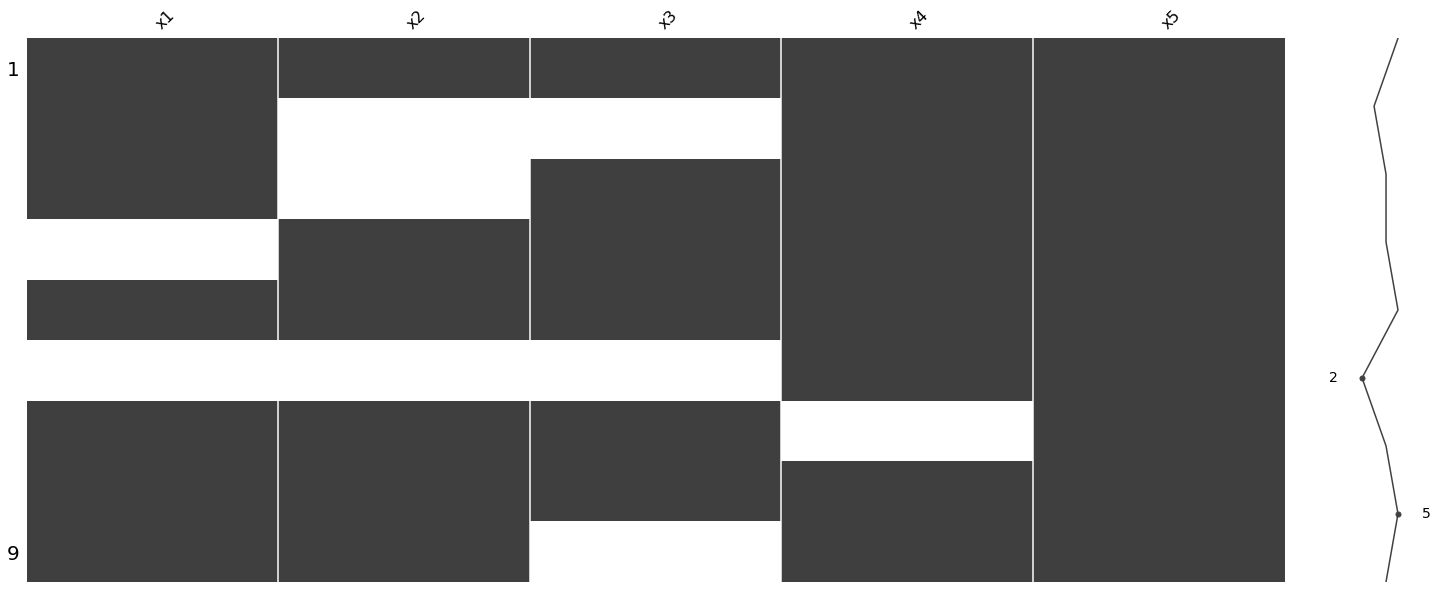

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno 
# 결측 데이터를 시각화하는 함수
# 결측 데이터는 흰색, 그렇지 않은 데이터는 검은색으로 시각화
msno.matrix(df)
plt.show()

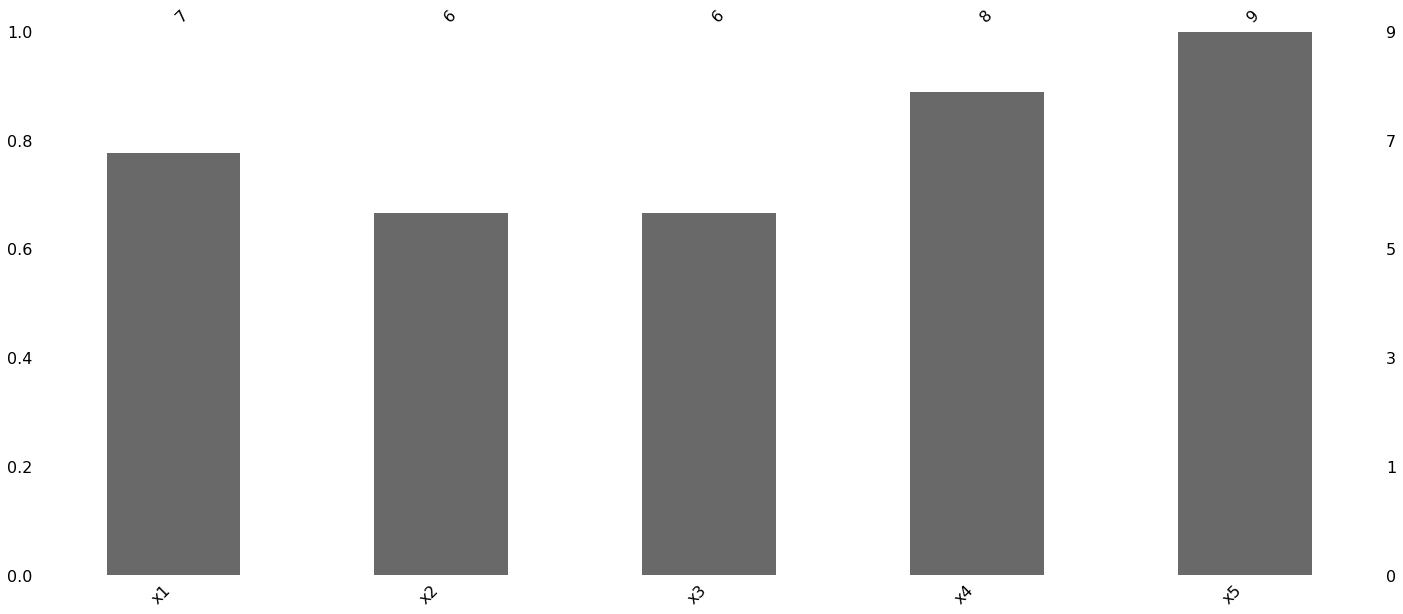

In [14]:
# 만약 각 열에 결측 데이터가 얼마나 존재하는지 시각화하고 싶다면
msno.bar(df) # 결측 데이터가 많을수록 bar 길이가 짧다
plt.show()

In [15]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
# 타이타닉 생존자 데이터를 이용한 missingno 활용 방법을 알아보자
titanic = sns.load_dataset('titanic')
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


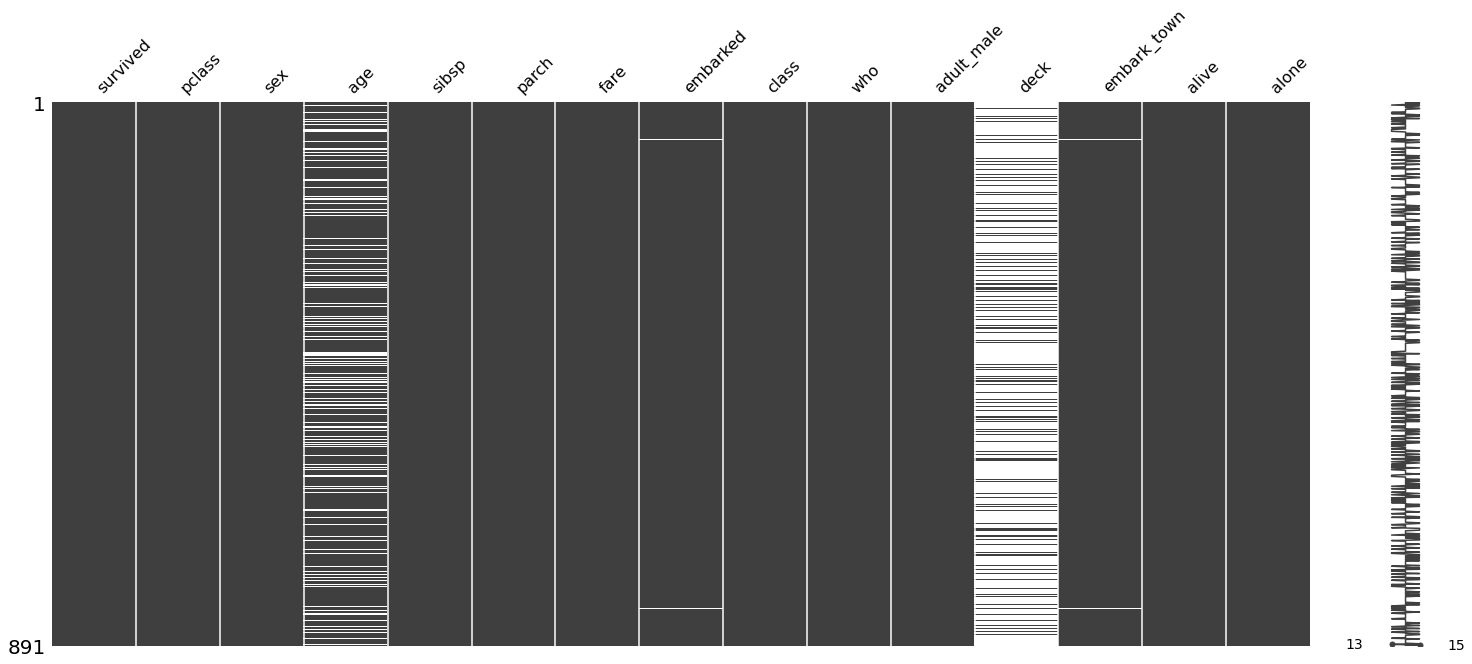

In [17]:
# missingno를 이용해 타이타닉 데이터에서 age , deck , embarked , embark_town 열에 대한 결측 데이터 확인
msno.matrix(titanic)
plt.show()

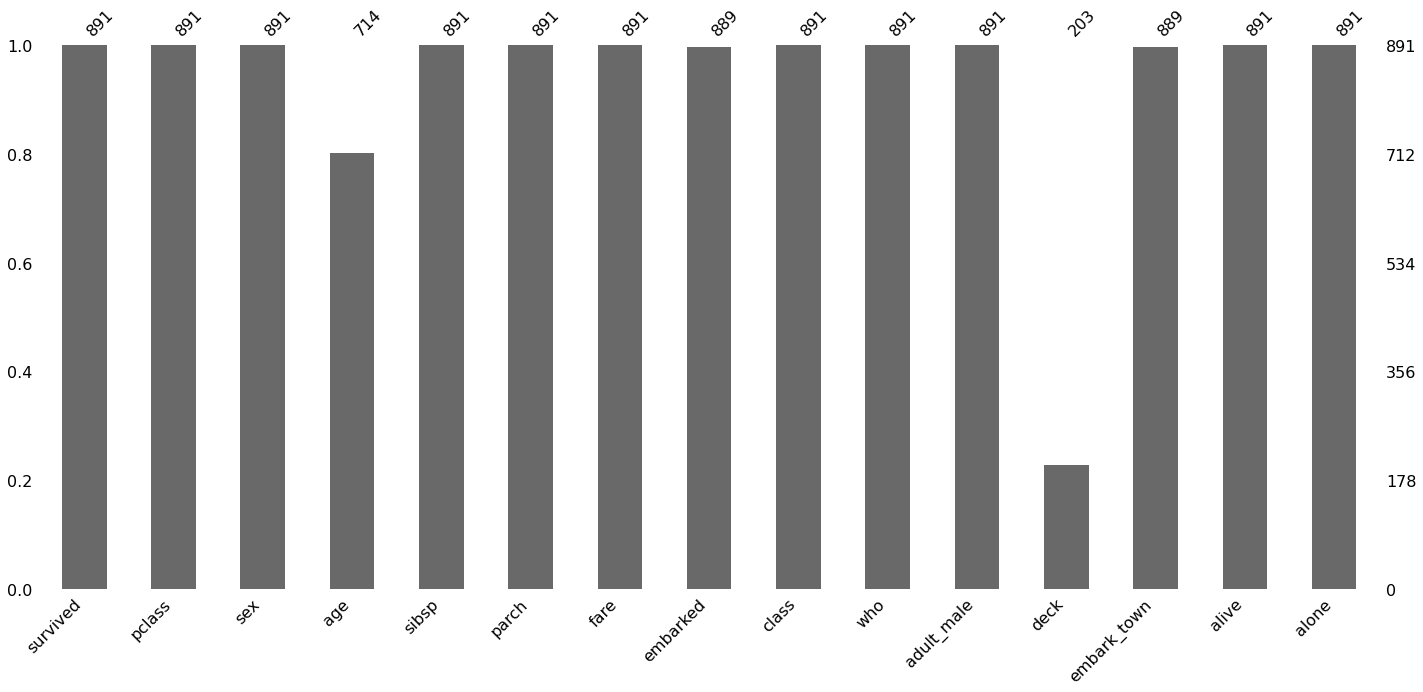

In [18]:
msno.bar(titanic)
plt.show()

### 결측 데이터 처리 방법
- 결측 데이터가 너무 많은 경우 해당 데이터의 열 전체 삭제
- 결측 데이터가 일부인 경우 가장 그럴듯한 값으로 대체

In [19]:
# dropna()
df.dropna() # 결측값 가진 모든 행 제거

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
4,5.0,0.5,5.0,2019-01-05,B
7,8.0,0.8,8.0,2019-01-08,B


In [20]:
df.dropna(axis=1) #결측값 가진 모든 열 제거

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [21]:
# thresh 특정 개수 이상의 비결측 데이터가 있는 행 또는 열만 제거한다
df.dropna(thresh=7, axis=1) # 데이터가 7개 이상 있지 않은 열 제거

,x1,x4,x5
0,1.0,2019-01-01,A
1,2.0,2019-01-02,B
2,3.0,2019-01-03,C
3,NaN,2019-01-04,A
4,5.0,2019-01-05,B
5,NaN,2019-01-06,C
6,7.0,NaN,A
7,8.0,2019-01-08,B
8,9.0,2019-01-09,C


In [22]:
# 위의 테이블과 비교
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


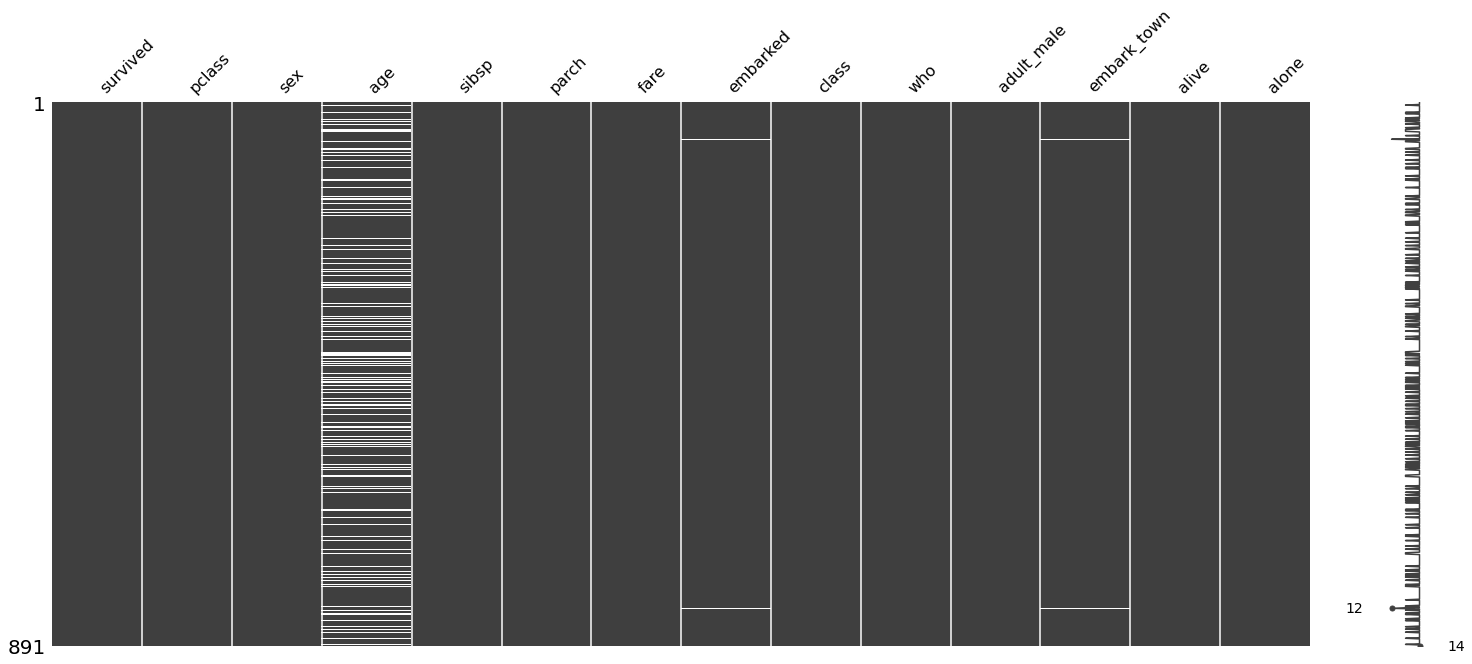

In [23]:
# titanic 데이터에서 결측치가 많은 deck 열 제거
titanic.dropna(thresh=int(len(titanic) * 0.5) , axis=1 , inplace=True) # 데이터 제거 기준 : titanic 데이터 길이의 50% 가 안 되면 제거

msno.matrix(titanic)
plt.show()

### 결측 데이터 대체 방법
- sklearn - SimpleImputer(평균, 중앙, 최빈값으로 대체)
-  fit transform 대체값이 채워진 데이터 프레임을 생성할 수 있다


In [25]:
import sklearn
print(sklearn.__version__)

0.23.1
